In [1]:
# Useful starting lines
import numpy as np
from helpers import *
from methods import *
from process_data import *
from crossValidation import *

%load_ext autoreload
%autoreload 2

seed=20

# Load the dataset

In [2]:
y, tX, ids = load_csv_data('Data/train.csv')
_, tX_test, ids_test = load_csv_data('Data/test.csv')

# Preprocessing

### Umbalanced Dataset

In [3]:
higgs = np.count_nonzero(y==1)
print(f'From {y.shape[0]} training examples, {higgs} are 1, i.e. the {higgs/y.shape[0]} %')

From 250000 training examples, 85667 are 1, i.e. the 0.342668 %


IDEA: We could use Undersampling\Oversampling alghoritms

### Manage missing values

In [4]:
tX, tX_test = missing_values(tX, tX_test)

SUPERIDEA: SLIT THE DATASET IN 4 CLASSES

### Standardization

In [5]:
tX, mean_tX, std_tX = standardize(tX)
tX_test, _, _ = standardize(tX_test, mean_tX, std_tX)

### Other Ideas

1. New features: Apply a polynomial basis to all the X features

2. PCA, correlation analysis (scatterplot, VIF, ...), manage the 0s in the last feature

3. Outlayer analysis, leverages, cook's metric ...

In [7]:
tX, tX_test = process_data(tX, tX_test, True)

# Methods

## 1. Least Squares with Gradient Descent

In [ ]:
loss, weights = least_squares_GD(y, tX,initial_w=np.zeros(tX.shape[1]), max_iters=1000, gamma=0.005)

# it shoud be in this form
# loss, weights = least_squares_GD(y, tx, initial w, max_iters, gamma)

## 2. Least Squares with Stochastic Gradient Descent

In [ ]:
# yet to be implemented
loss, weights = least_squares_SGD(y, tX, initial_w=np.zeros(tX.shape[1]), batch_size=len(y), max_iters=1000, gamma=0.005)

## 3. Least Squares with Normal Equations 

In [68]:
loss, weights = least_squares(y, tX)

## 4. Ridge regression with Normal Equations

In [13]:
loss, weights = ridge_regression(y, tX, best_lambda)

## 5. Logistic Regression with Stochastic Gradient Descent


In [16]:
loss, weights = logistic_regression(y, tX,initial_w= np.random.random(tX.shape[1]), batch_size=1, max_iter=10000, gamma=0.0009)

1.8760657510233796 0 /10000
1.8343218776462225 100 /10000
1.807628778823334 200 /10000
1.765823148981027 300 /10000
1.7340189416907177 400 /10000
1.7043158829704317 500 /10000
1.653869930577796 600 /10000
1.6124213016414632 700 /10000
1.5720306976343916 800 /10000
1.5459395273192031 900 /10000
1.52750529850916 1000 /10000
1.483773852711879 1100 /10000
1.4649316015818925 1200 /10000
1.4385850903705848 1300 /10000
1.3877052197503865 1400 /10000
1.370407755420808 1500 /10000
1.356987131100323 1600 /10000
1.3215197353188828 1700 /10000
1.2881053155063213 1800 /10000
1.2586316078136532 1900 /10000
1.2422827651024733 2000 /10000
1.2286036620024539 2100 /10000
1.1995289507705293 2200 /10000
1.1786971893714477 2300 /10000
1.1645750079876753 2400 /10000
1.1505134705467184 2500 /10000
1.1322418817055724 2600 /10000
1.121959777340855 2700 /10000
1.1033686195404966 2800 /10000
1.0922332565263309 2900 /10000
1.0739384838293473 3000 /10000
1.0472990353018254 3100 /10000
1.0368610817540556 3200 /1000

## 6. Regularized Logistic Regression with Stochastic Gradient Descent

In [ ]:
# yet to be implemented
# loss, weights = reg_logistic regression(y, tX, initial w, max_iters, gamma)

# Cross Validation
IDEA: insert CV in each of the methods above

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


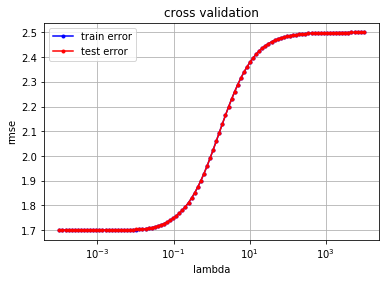

In [12]:
# To evaluate the best lambda that minimizes the test error
loss, weights, best_lambda = cross_validation_ridge_regression(y,tX)

In [ ]:
# To evaluate the mean test error that we expect, the third argument should be one of the 6 methods used  
loss = cross_validation_general(y,tX,fun,logistic_regression,k_fold = 4)

# Prediction

#### Generate predictions and save ouput in csv format for submission

In [14]:
# Only for non logistic methods
y_pred = predict_labels(weights, tX_test)

In [44]:
# Only for Logistic methods
y_pred = sigmoid(tX_test@weights)
y_pred[y_pred <0.5] = -1
y_pred[y_pred > 0.5] = 1

In [15]:
OUTPUT_PATH = 'data/FIRSTsubmission.csv' 
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

ATTENTION: we are prediction too LESS 1

In [16]:
higgs = np.count_nonzero(y_pred==1)
print(f'From {y_pred.shape[0]} test examples, {higgs} are 1, i.e. the {higgs/y_pred.shape[0]} %')

From 568238 test examples, 142115 are 1, i.e. the 0.2500976703423565 %
